# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mergedData = pd.merge(mouse_metadata , study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
mergedData.head(5)




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [11]:
# How many distinct mice are in the merged dataframe?
number_mice = mergedData["Mouse ID"].nunique()
number_mice

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Any duplicate Mouse ID & Timepoint combinations?
dupes = mergedData[mergedData.duplicated(subset=["Mouse ID", "Timepoint"])]
dupes.head()
print(f"Duplicate rows: {dupes.shape[0]}")

Duplicate rows: 5


In [13]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates2 = mergedData.loc[mergedData.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicates2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = mergedData[~mergedData['Mouse ID'].isin(duplicates2)].sort_values(by="Timepoint")
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.0,0
617,h531,Ceftamin,Male,5,27,0,45.0,0
616,h428,Ketapril,Female,1,27,0,45.0,0
609,h333,Stelasyn,Male,21,27,0,45.0,0
1633,w193,Infubinol,Male,22,30,0,45.0,0


In [19]:
# Checking the number of mice in the clean DataFrame.
mice_count = new_df['Mouse ID'].nunique()
mice_count

249

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

grouped = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean_mice = grouped.mean()
med_mice = grouped.median()
var_mice = grouped.var()
stdev_mice = grouped.std()
sem_mice = grouped.sem()
new_df_summary = pd.DataFrame({'Mean': mean_mice,
                              'Median': med_mice,
                              'Variance': var_mice, 
                              'Standard Deviation': stdev_mice, 
                              'SEM': sem_mice})
#Assemble the resulting series into a single summary DataFrame.
new_df_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
grouped_agg = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Mean='mean', Median='median', Variance='var', Standard_Dev='std',SEM='sem')

# Using the aggregation method, produce the same summary statistics in a single line

grouped_agg
# Using the aggregation method, produce the same summary statistics in a single line
# summary_agg = grouped.agg
# summary_agg

,Mean,Median,Variance,Standard_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

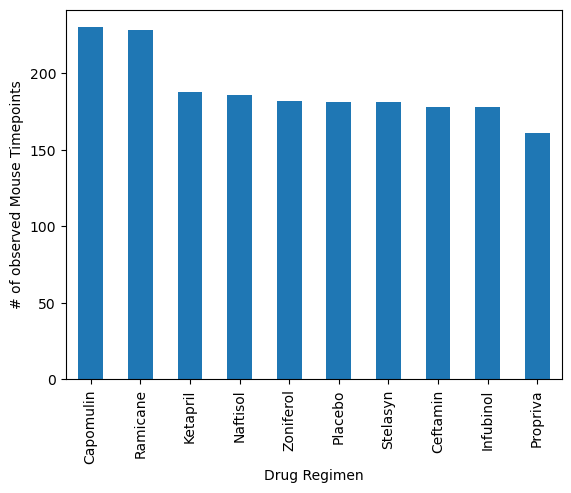

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_grouped = new_df.groupby('Drug Regimen')['Timepoint'].count().reset_index().sort_values(by='Timepoint', ascending = False)
bar_grouped.plot.bar(x='Drug Regimen', y='Timepoint', xlabel = 'Drug Regimen', ylabel = '# of observed Mouse Timepoints', legend = False);


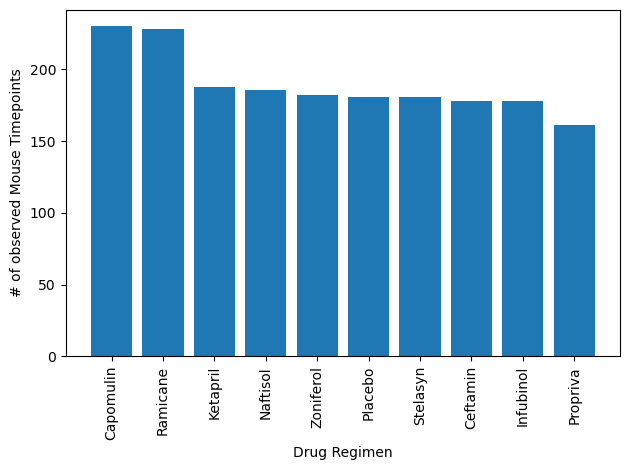

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pybar = new_df.groupby('Drug Regimen')['Timepoint'].count().reset_index().sort_values(by='Timepoint', ascending = False)
pybar_x = pybar['Drug Regimen']
pybar_y = pybar['Timepoint']
plt.bar(pybar_x, pybar_y)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

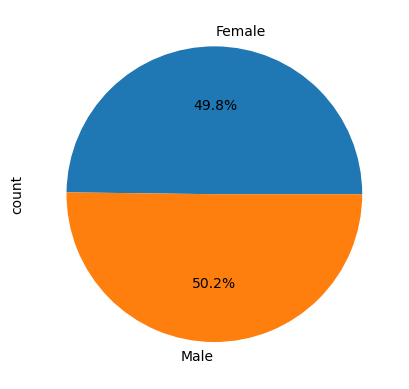

In [24]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_counts = new_df.groupby('Sex')['Mouse ID'].nunique().rename('count')

# Make the pie chart
mice_pie = mice_counts.plot.pie(autopct = '%1.1f%%', legend = False);

<function matplotlib.pyplot.show(close=None, block=None)>

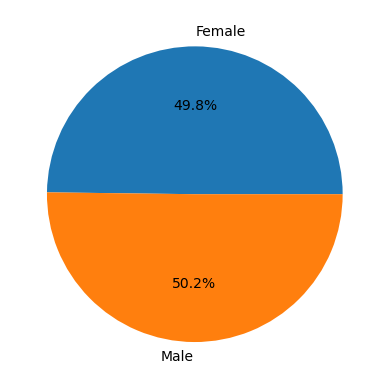

In [25]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mice_counts2 = new_df.groupby('Sex')['Mouse ID'].nunique().reset_index()
mice_counts_col = mice_counts2.rename(columns = {'Mouse ID': 'count'})
mice_sx = mice_counts_col['Sex']
mice_counts = mice_counts_col['count']
plt.pie(mice_counts, labels = mice_sx, autopct='%1.1f%%')


# Make the pie chart
plt.show

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_time = new_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = grouped_time.merge(new_df, on = ['Mouse ID', 'Timepoint'], how = 'left')
merged_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drugs in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_df.loc[merged_df['Drug Regimen'] == drugs, 'Tumor Volume (mm3)']
    #add subset
    tumor_vol.append(tumor_volume)   
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drugs}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


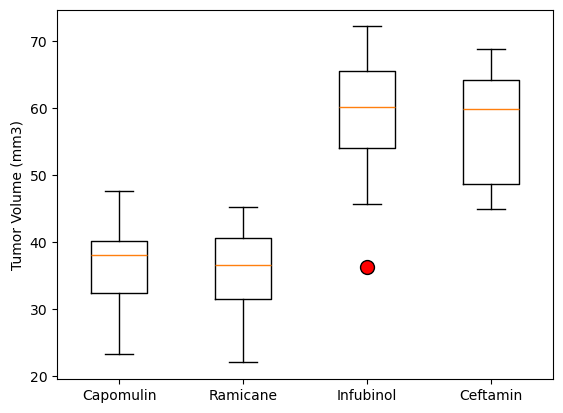

In [32]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = {'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10}

plt.boxplot(tumor_vol, tick_labels=treatments, flierprops=flierprops)
plt.ylabel('Tumor Volume (mm3)')

plt.show()



## Line and Scatter Plots

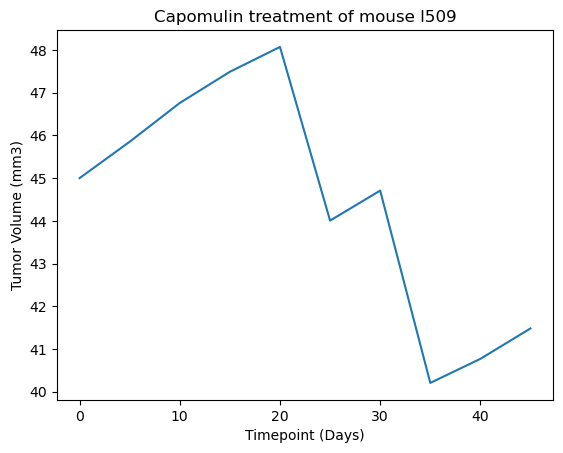

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
volume_timepoint_df = new_df.loc[new_df['Mouse ID'] == 'l509']
volume_timepoint_grouped = volume_timepoint_df.reset_index()
volume_timepoint_grouped.plot('Timepoint', 'Tumor Volume (mm3)', ylabel = 'Tumor Volume (mm3)', xlabel= 'Timepoint (Days)', legend = False, title = 'Capomulin treatment of mouse l509');


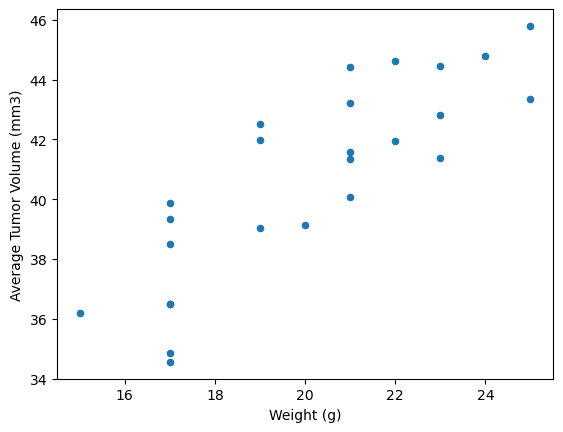

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


capomulin = new_df[new_df['Drug Regimen'] == 'Capomulin']
weight_df = capomulin.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean().reset_index()
weight_df.plot.scatter('Weight (g)', 'Tumor Volume (mm3)', xlabel = 'Weight (g)', ylabel = 'Average Tumor Volume (mm3)');


## Correlation and Regression

Correlation coefficient: 0.8419363424694721
Slope: 0.9544396890241049, Intercept: 21.552160532685008
R-squared: 0.7088568047708723


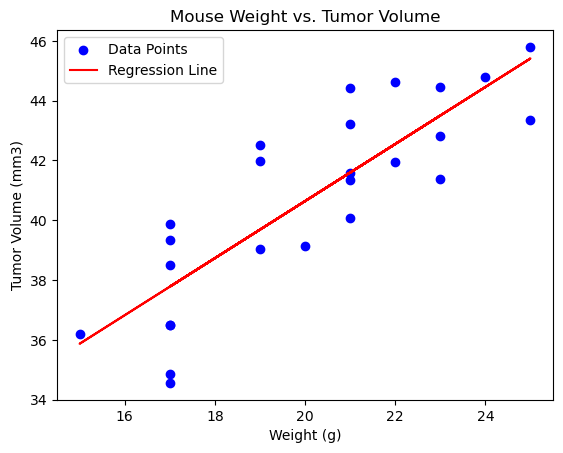

In [35]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# correlation, p-value = st.pearsonr(
correlation, p_value = st.pearsonr(weight_df['Weight (g)'], weight_df['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")
slope, intercept, r_value, p_value, std_err = st.linregress(weight_df['Weight (g)'], weight_df['Tumor Volume (mm3)'])
print(f"Slope: {slope}, Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
plt.scatter(weight_df['Weight (g)'], weight_df['Tumor Volume (mm3)'], label='Data Points', color='blue')

regression_values = slope * weight_df['Weight (g)'] + intercept
plt.plot(weight_df['Weight (g)'], regression_values, color='red', label='Regression Line')

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Tumor Volume')
plt.legend()
plt.show()